<a href="https://colab.research.google.com/github/99Ayush99/StockPrediction/blob/main/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import pandas as pd
#df = pd.read_csv('AAPL.csv')

df = pd.read_csv('AAPL.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-13,124.580002,126.150002,124.260002,124.970001,124.260078,105861300
1,2021-05-14,126.250000,127.889999,125.849998,127.449997,126.725983,81918000
2,2021-05-17,126.820000,126.930000,125.169998,126.269997,125.552681,74244600
3,2021-05-18,126.559998,126.989998,124.779999,124.849998,124.140755,63342900
4,2021-05-19,123.160004,124.919998,122.860001,124.690002,123.981659,92612000


In [ ]:
df.tail(7)

,Date,Open,High,Low,Close,Adj Close,Volume
246,2022-05-04,159.669998,166.479996,159.259995,166.020004,165.776428,108256500
247,2022-05-05,163.850006,164.080002,154.949997,156.770004,156.540009,130525300
248,2022-05-06,156.009995,159.440002,154.179993,157.279999,157.279999,116055700
249,2022-05-09,154.929993,155.830002,151.490005,152.059998,152.059998,131577900
250,2022-05-10,155.520004,156.740005,152.929993,154.509995,154.509995,115366700
251,2022-05-11,153.500000,155.449997,145.809998,146.500000,146.500000,142689800
252,2022-05-12,142.770004,146.199997,138.800003,142.559998,142.559998,182271000


In [ ]:
df = df[['Date', 'Close']]
df.head()

,Date,Close
0,2021-05-13,124.970001
1,2021-05-14,127.449997
2,2021-05-17,126.269997
3,2021-05-18,124.849998
4,2021-05-19,124.690002


In [ ]:
df.tail(7)

,Date,Close
246,2022-05-04,166.020004
247,2022-05-05,156.770004
248,2022-05-06,157.279999
249,2022-05-09,152.059998
250,2022-05-10,154.509995
251,2022-05-11,146.500000
252,2022-05-12,142.559998


In [ ]:
#df = df.replace({'\$':''}, regex = True)
#df = df.astype({"Close": float})
#df["Date"] = pd.to_datetime(df.Date, format="%m/%d/%Y")
df.dtypes

Date      object
Close    float64
dtype: object

In [ ]:
#df = df.astype({"Close": float})
#df["Date"] = pd.to_datetime(df.Date, format="%m/%d/%Y")
df.dtypes

Date      object
Close    float64
dtype: object

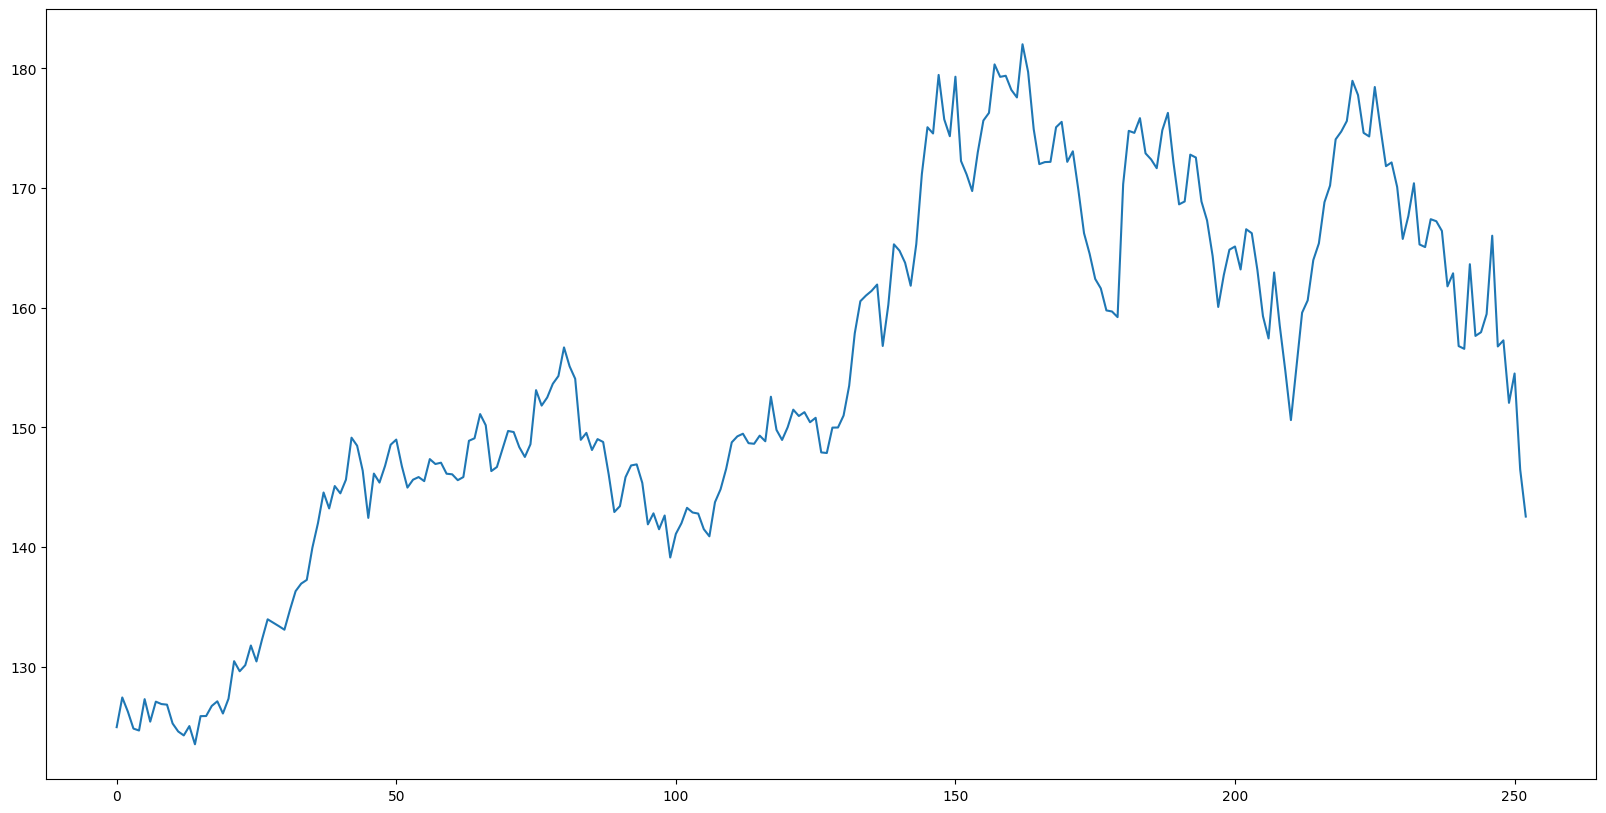

In [ ]:
plt.plot(df["Close"],label='Close Price history')

In [ ]:
df = df.sort_index(ascending=True,axis=0)
data = pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(0,len(data)):
    data["Date"][i]=df['Date'][i]
    data["Close"][i]=df["Close"][i]
data.head()

,Date,Close
0,2021-05-13,124.970001
1,2021-05-14,127.449997
2,2021-05-17,126.269997
3,2021-05-18,124.849998
4,2021-05-19,124.690002


In [ ]:
df.dtypes

Date      object
Close    float64
dtype: object

In [ ]:
df = df.sort_index(ascending=True,axis=0)
data = pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(0,len(data)):
    data["Date"][i]=df['Date'][i]
    data["Close"][i]=df["Close"][i]
data.head()

,Date,Close
0,2021-05-13,124.970001
1,2021-05-14,127.449997
2,2021-05-17,126.269997
3,2021-05-18,124.849998
4,2021-05-19,124.690002


In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
data.index=data.Date
data.drop('Date',axis=1,inplace=True)
final_data = data.values
train_data=final_data[0:200,:]
valid_data=final_data[200:,:]
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_data)
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

In [ ]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(np.shape(x_train_data)[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
model_data=data[len(data)-len(valid_data)-60:].values
model_data=model_data.reshape(-1,1)
model_data=scaler.transform(model_data)

In [ ]:
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
x_train_data = np.asarray(x_train_data)
y_train_data = np.asarray(y_train_data)
valid_data = np.asarray(valid_data)
#validation_y = np.asarray(validation_y)
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)
X_test=[]
for i in range(60,model_data.shape[0]):
    X_test.append(model_data[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

140/140 - 9s - loss: 0.0280 - 9s/epoch - 61ms/step


In [ ]:
predicted_stock_price=lstm_model.predict(X_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)

2/2 [==============================] - 1s 16ms/step


<ipython-input-17-f20481b0e314>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=predicted_stock_price


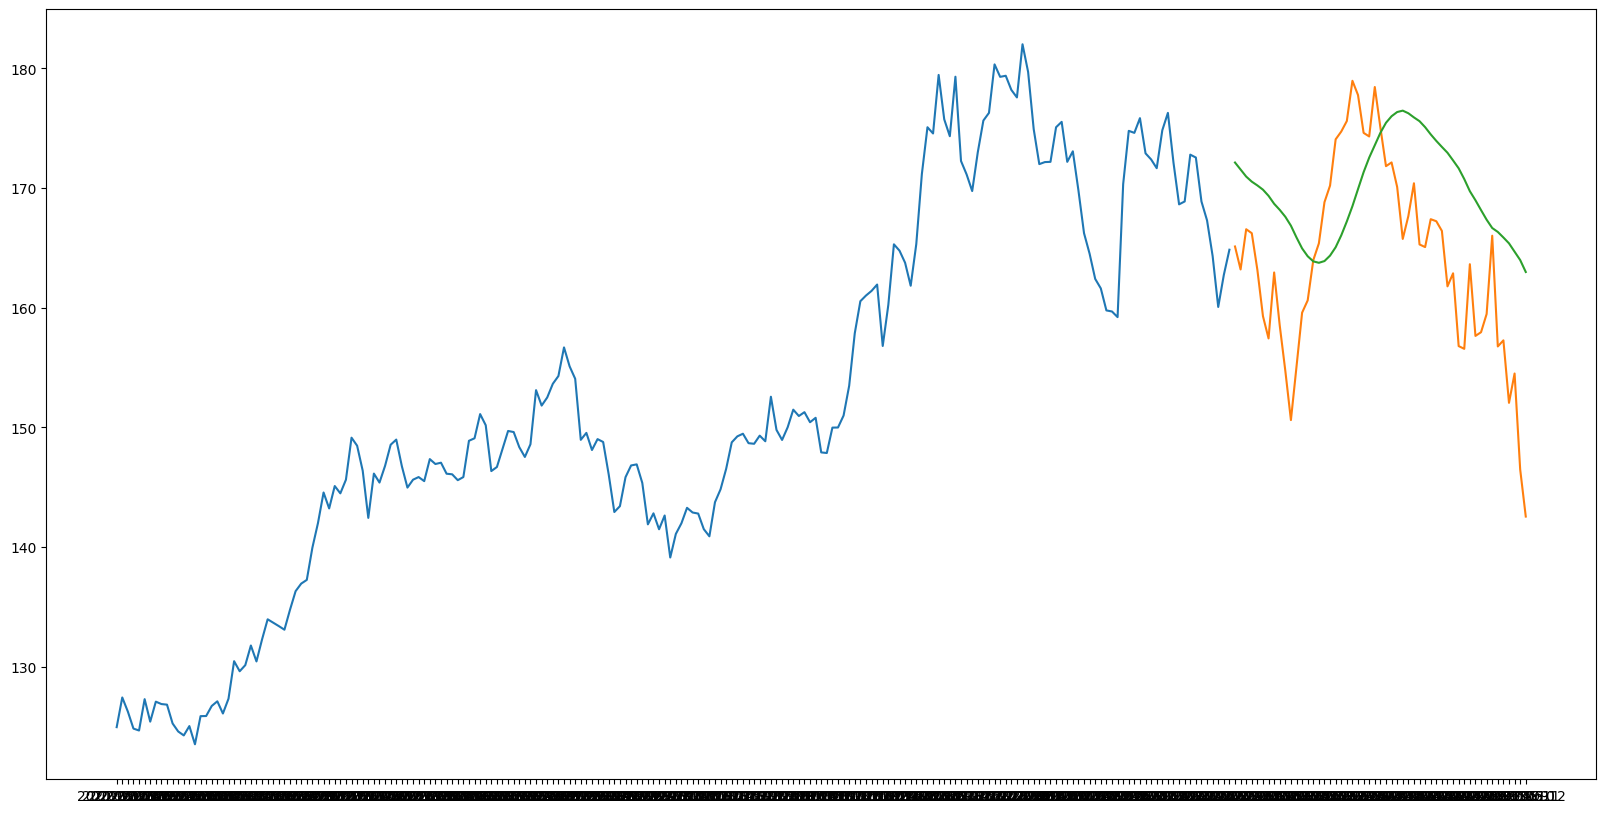

In [ ]:
                                                                                                                                                                                                                                                                                                                                                                  train_data=data[:200]
valid_data=data[200:]
valid_data['Predictions']=predicted_stock_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])